

# Project: Investigate a Dataset (TMDB 5000 Movie Dataset!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset is about movies and it's corresponding features like revenue and productio companies.
>
> We'll be focusing on the revenue feature and the other independent features.
>
> This data is choosed personally from **kaggle.com**.
>
> What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over 100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

In [65]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [15]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [16]:
df.drop(['imdb_id', 'homepage', 'release_date'], inplace=True, axis=1)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3854 non-null   int64  
 1   popularity            3854 non-null   float64
 2   budget                3854 non-null   int64  
 3   revenue               3854 non-null   int64  
 4   original_title        3854 non-null   object 
 5   cast                  3854 non-null   object 
 6   director              3854 non-null   object 
 7   tagline               3854 non-null   object 
 8   keywords              3854 non-null   object 
 9   overview              3854 non-null   object 
 10  runtime               3854 non-null   int64  
 11  genres                3854 non-null   object 
 12  production_companies  3854 non-null   object 
 13  vote_count            3854 non-null   int64  
 14  vote_average          3854 non-null   float64
 15  release_year        

### Data Cleaning (remove duplicates, check the NaN values and delete or replace it)

In [127]:
# remove duplicated values
df = df[df.duplicated() == False]

In [38]:
# removing all rows that does not have values in genres, budget or revenue columns
df = df[df['genres'].isna() == False]

In [46]:
df = df[(df['budget'] != 0) & (df['revenue'] != 0)]

In [62]:
# fill the NaN string objects by 'none'
df.fillna('none', inplace=True)

In [89]:
# making columns of adjusting revenue and budget to a readable titles
df['budget_adj'] = df['budget'] / df['budget'].max() #values from 0 to 1

In [91]:
df['revenue_adj'] = df['revenue'] / df['revenue'].max() #values from 0 to 1

In [240]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,8.753811e-02,3.871522e-02
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,9.931347e-02,6.346898e-02
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,2.352941e-09,7.190350e-10
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,2.352941e-02,4.889449e-03
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,5.647059e-02,1.610638e-02
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,1.176471e-01,4.465658e-02
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,1.000000e+00,1.000000e+00


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 
### (Does the movie runtime affects the revenue or not, and what affects most on revenue?)

In [94]:
# sort df by revenue column of action movies 
# most 5 movies of high revenue
df_r = df[df['genres'].str.contains('Action')].sort_values('revenue', axis=0, ascending=False).iloc[:5, :]

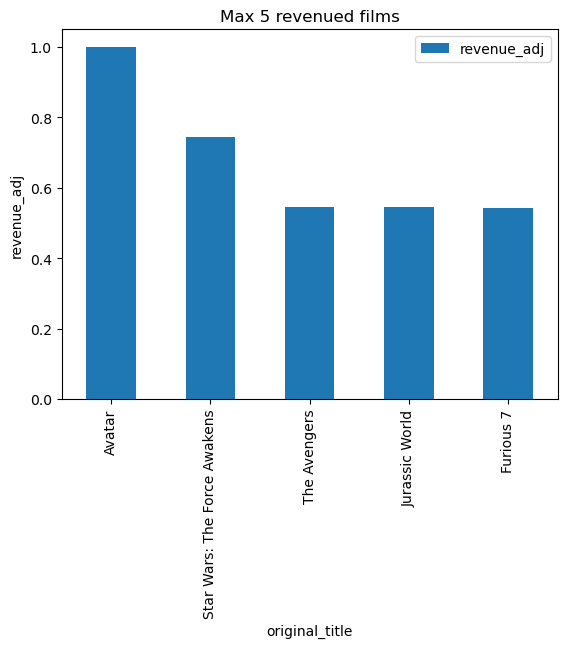

In [241]:
df_r.plot(kind='bar', x='original_title', y='revenue_adj');
plt.xlabel('original_title');
plt.ylabel('revenue_adj');
plt.title('Max 5 revenued films');

<a id='eda'></a>

### Research Question 2 
### (Find the max 5 years with high revenue?)

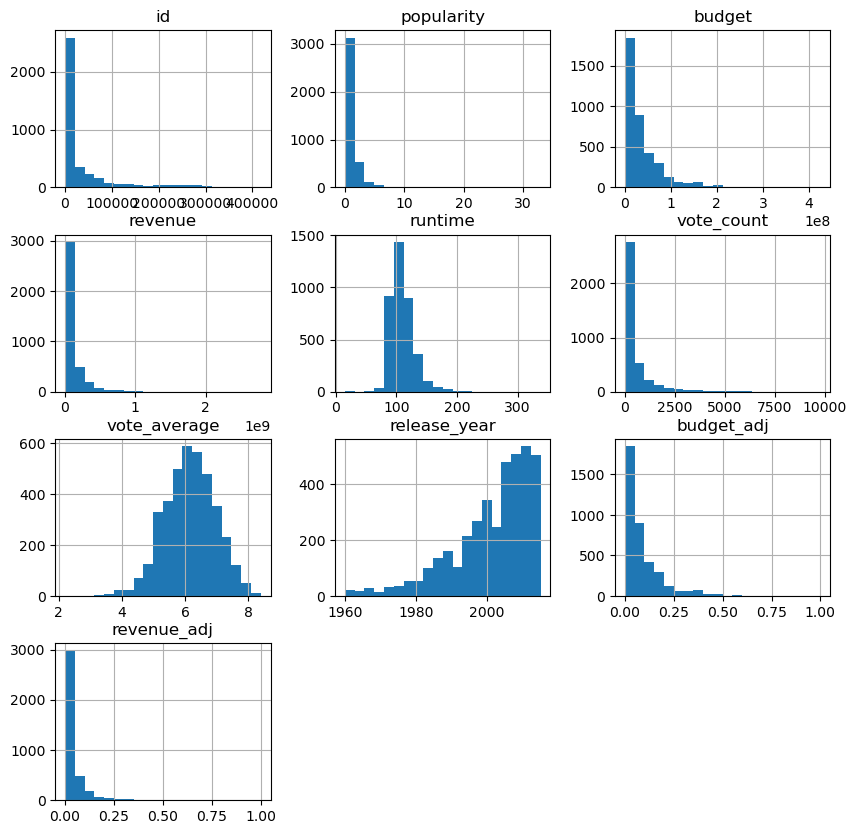

In [251]:
# overview on histogram to all features
df.hist(figsize=(10, 10), bins=20);

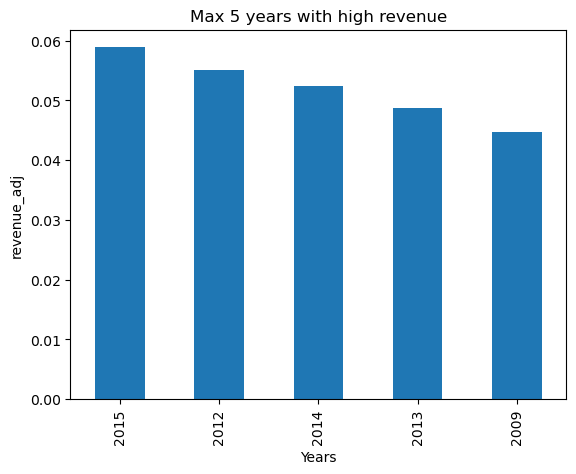

In [120]:
# max 5 year of revenue
max_rev = df.groupby('release_year').mean()['revenue_adj'].sort_values(ascending=False)[:5]
max_rev.plot(kind='bar')
plt.xlabel('Years');
plt.ylabel('revenue_adj');
plt.title('Max 5 years with high revenue');

<a id='eda'></a>

### Research Question 3 
### (Find the max correlation between revenue and the other features?)

In [234]:
# checking the correlation between revenue and the other features
df.corr()['revenue'].sort_values(ascending=False)[2:-1]

vote_count      0.754567
budget_adj      0.688556
budget          0.688556
popularity      0.615535
runtime         0.250298
vote_average    0.227123
release_year    0.139140
Name: revenue, dtype: float64

<a id='eda'></a>
### Research Question 4 
### (Max revenued genre feature?)

In [192]:
# make a set of all genres
set_ = set()
for cell in df['genres']:
    words = cell.strip().split('|')
    for i, j in enumerate(words):
        set_.add(j)
genres = list(set_)

In [199]:
# most 5 revenues genres
cat = {}
for genre in genres:
    cat[genre] = df['genres'].str.contains(genre).value_counts()[1]

In [202]:
# the max count of genres is:
max_count = max(cat.values())
max_key = max(cat, key=cat.get)
print(max_key + ' genre has: ' + str(max_count) + ' counts')

Drama genre has: 1756 counts


In [205]:
# Here we see drama comes first then comedy and thriller
print({k: v for k, v in sorted(cat.items(), key=lambda item: item[1])})

{'TV Movie': 1, 'Foreign': 13, 'Documentary': 35, 'Western': 52, 'War': 119, 'History': 129, 'Music': 136, 'Animation': 201, 'Mystery': 344, 'Fantasy': 396, 'Family': 425, 'Horror': 463, 'Science Fiction': 519, 'Crime': 651, 'Romance': 667, 'Adventure': 749, 'Action': 1085, 'Thriller': 1204, 'Comedy': 1358, 'Drama': 1756}


<a id='eda'></a>
### Research Question 5
### (Max revenued production company?)

In [207]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,0.352941,0.54414


In [239]:
# check the max companies revenues
# make a set of all companies
set_us = set()
for cell in df['production_companies']:
    words = cell.strip().split('|')
    for i, j in enumerate(words):
        set_us.add(j)
companies = list(set_us)

In [233]:
dict_co = {}
for i, company in enumerate(companies):
    df_us = df[df['production_companies'].str.contains(company)]
    df_us.budget.sum()
    dict_co[company] = df_us.budget.sum()

C:\Users\MKhElhalawany\AppData\Local\Temp\ipykernel_10532\836184329.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_us = df[df['production_companies'].str.contains(company)]


In [222]:
dict_co = {k: v for k, v in sorted(dict_co.items(), key=lambda item: item[1])}

In [232]:
# the max revenue company is WARNER BROS.
max_count = max(dict_co.values())
max_key = max(dict_co, key=dict_co.get)
print(max_key + ' genre has: ' + str(max_count) + ' counts')

Warner Bros. genre has: 20179362367 counts


<a id='conclusions'></a>
## Conclusions

> I found that revenue is strong correlated with vote_count, thus, the popularity affects on th revenue.

> The max revenued genre is drama.

> The max revenued production company is WARNER PROS.